Import Libraries and Load Dataset

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import chi2_contingency, f_oneway
import joblib

# Load the dataset
data = pd.read_csv("depression.csv")  # Replace with your actual file name
print("Dataset Overview:")
print(data.head())
print(data.info())

Dataset Overview:
        Age  Gender Occupation        Days_Indoors Growing_Stress  \
0     20-25  Female  Corporate           1-14 days            Yes   
1  30-Above    Male     Others          31-60 days            Yes   
2  30-Above  Female    Student    Go out Every day             No   
3     25-30    Male     Others           1-14 days            Yes   
4     16-20  Female    Student  More than 2 months            Yes   

  Quarantine_Frustrations Changes_Habits Mental_Health_History Weight_Change  \
0                     Yes             No                   Yes           Yes   
1                     Yes          Maybe                    No            No   
2                      No            Yes                    No            No   
3                      No          Maybe                    No         Maybe   
4                     Yes            Yes                    No           Yes   

  Mood_Swings Coping_Struggles Work_Interest Social_Weakness  
0      Medium          

Inspect Dataset

In [7]:
# Display column names and unique values in each column
print("Columns in the dataset:", data.columns)
for col in data.columns:
    print(f"{col} unique values: {data[col].unique()}")

Columns in the dataset: Index(['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
       'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
       'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
       'Social_Weakness'],
      dtype='object')
Age unique values: ['20-25' '30-Above' '25-30' '16-20']
Gender unique values: ['Female' 'Male']
Occupation unique values: ['Corporate' 'Others' 'Student' 'Housewife' 'Business']
Days_Indoors unique values: ['1-14 days' '31-60 days' 'Go out Every day' 'More than 2 months'
 '15-30 days']
Growing_Stress unique values: ['Yes' 'No' 'Maybe']
Quarantine_Frustrations unique values: ['Yes' 'No' 'Maybe']
Changes_Habits unique values: ['No' 'Maybe' 'Yes']
Mental_Health_History unique values: ['Yes' 'No' 'Maybe']
Weight_Change unique values: ['Yes' 'No' 'Maybe']
Mood_Swings unique values: ['Medium' 'High' 'Low']
Coping_Struggles unique values: ['No' 'Yes']
Work_Interest unique values: ['No' 'Maybe' 'Yes']

Handle Missing Data

In [8]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Fill missing values using forward fill method
data.fillna(method='ffill', inplace=True)

# Verify missing values are handled
print("After handling missing values:\n", data.isnull().sum())

Missing values per column:
 Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64
After handling missing values:
 Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


<ipython-input-8-8f306067ca15>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Encode Categorical Variables

In [9]:
# Encode categorical variables into numerical values
encoder = LabelEncoder()

data['Gender_Encoded'] = encoder.fit_transform(data['Gender'])
data['Occupation_Encoded'] = encoder.fit_transform(data['Occupation'])
data['Days_Indoors_Encoded'] = encoder.fit_transform(data['Days_Indoors'])
data['Growing_Stress_Encoded'] = encoder.fit_transform(data['Growing_Stress'])
data['Mood_Swings_Encoded'] = encoder.fit_transform(data['Mood_Swings'])

print("Encoded data preview:\n", data[['Gender', 'Gender_Encoded', 'Occupation', 'Occupation_Encoded']].head())

Encoded data preview:
    Gender  Gender_Encoded Occupation  Occupation_Encoded
0  Female               0  Corporate                   1
1    Male               1     Others                   3
2  Female               0    Student                   4
3    Male               1     Others                   3
4  Female               0    Student                   4


Exploratory Data Analysis (EDA)

1. Distribution of Growing Stress

<ipython-input-10-b2b9e057ddec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Growing_Stress', data=data, palette='coolwarm')


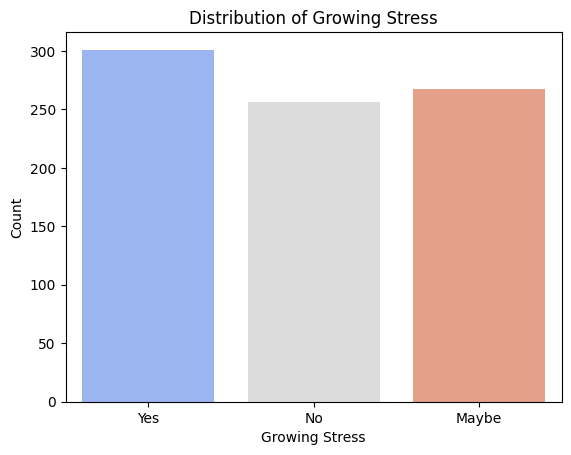

In [10]:
sns.countplot(x='Growing_Stress', data=data, palette='coolwarm')
plt.title("Distribution of Growing Stress")
plt.xlabel("Growing Stress")
plt.ylabel("Count")
plt.show()

2. Distribution of Mood Swings

<ipython-input-11-70b1d52e0215>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mood_Swings', data=data, palette='viridis')


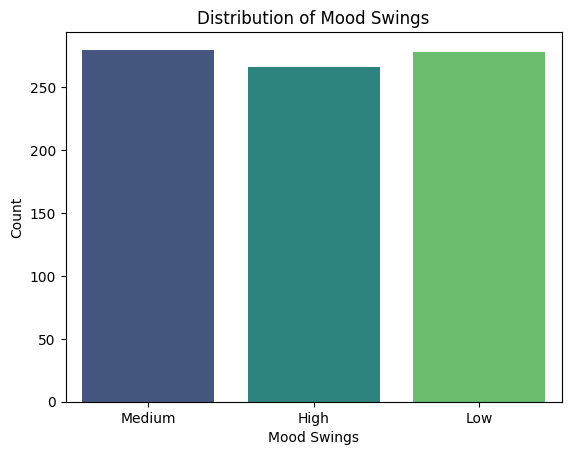

In [11]:
sns.countplot(x='Mood_Swings', data=data, palette='viridis')
plt.title("Distribution of Mood Swings")
plt.xlabel("Mood Swings")
plt.ylabel("Count")
plt.show()

Visualize Relationships

1. Growing Stress by Gender

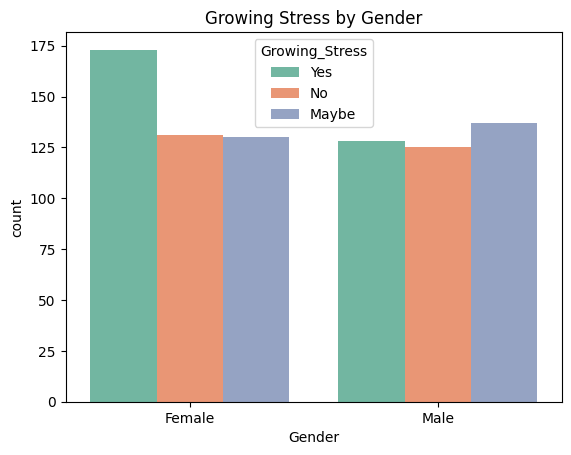

In [12]:
sns.countplot(x='Gender', hue='Growing_Stress', data=data, palette='Set2')
plt.title("Growing Stress by Gender")
plt.show()

2. Mood Swings by Occupation

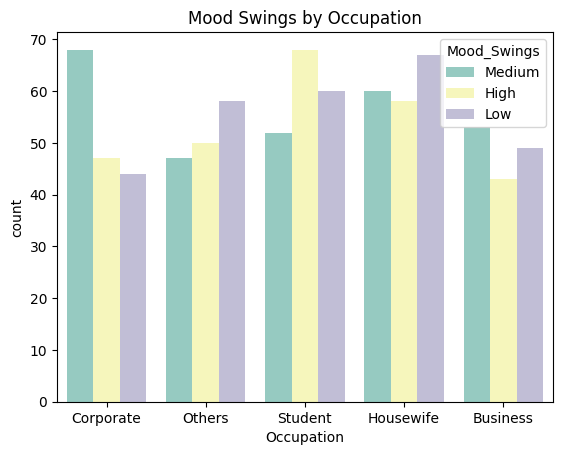

In [13]:
sns.countplot(x='Occupation', hue='Mood_Swings', data=data, palette='Set3')
plt.title("Mood Swings by Occupation")
plt.show()

Correlation Matrix

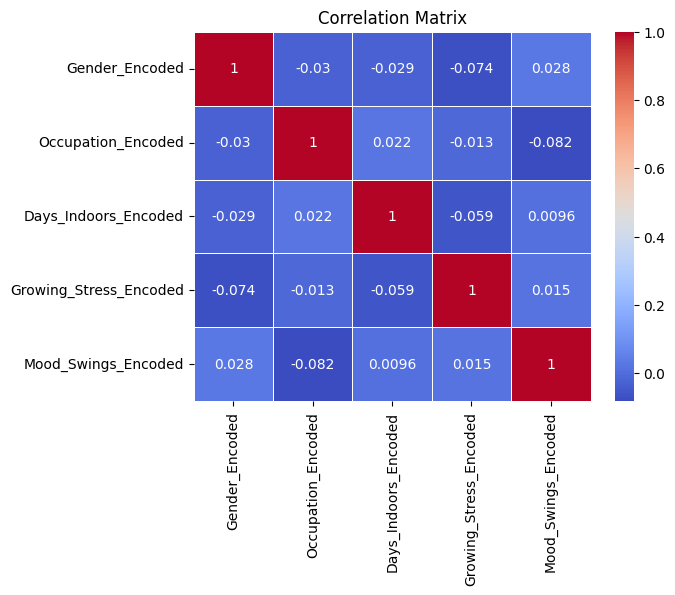

In [14]:
# Calculate and visualize correlation matrix
corr_matrix = data[['Gender_Encoded', 'Occupation_Encoded', 'Days_Indoors_Encoded',
                    'Growing_Stress_Encoded', 'Mood_Swings_Encoded']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Prepare Features and Target

In [15]:
# Define features (X) and target (y)
X = data[['Gender_Encoded', 'Occupation_Encoded', 'Days_Indoors_Encoded']]
y = data['Growing_Stress_Encoded']  # Replace with any target you want to predict

print("Features preview:\n", X.head())
print("Target preview:\n", y.head())

Features preview:
    Gender_Encoded  Occupation_Encoded  Days_Indoors_Encoded
0               0                   1                     0
1               1                   3                     2
2               0                   4                     3
3               1                   3                     0
4               0                   4                     4
Target preview:
 0    2
1    2
2    1
3    2
4    2
Name: Growing_Stress_Encoded, dtype: int64


Split Data into Training and Test Sets

In [16]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (576, 3)
Test set size: (248, 3)


Train a Random Forest Model

In [17]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.34274193548387094
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.24      0.30        90
           1       0.33      0.37      0.35        81
           2       0.32      0.43      0.37        77

    accuracy                           0.34       248
   macro avg       0.35      0.35      0.34       248
weighted avg       0.35      0.34      0.34       248



Feature Importance Visualization

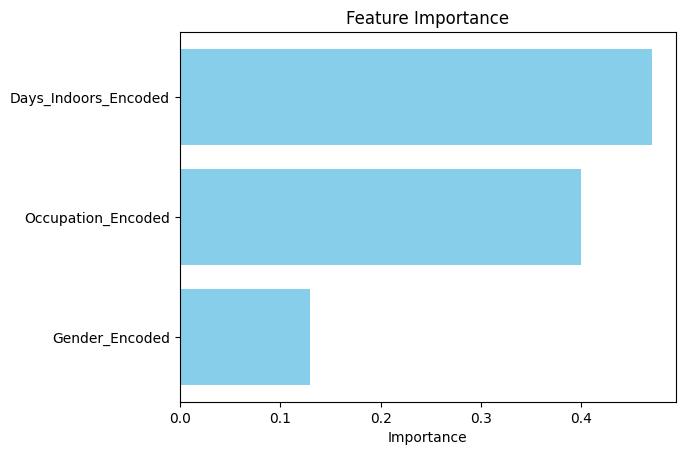

In [18]:
# Plot feature importance
importances = rf_model.feature_importances_
features = X.columns

plt.barh(features, importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

Perform Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average Cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.34545455 0.3030303  0.35151515 0.32121212 0.3902439 ]
Average Cross-validation score: 0.3422912047302291


Statistical Test: Chi-Square (Gender vs Growing Stress)

In [20]:
# Create contingency table
contingency_table = pd.crosstab(data['Gender'], data['Growing_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:\nChi2: {chi2}, P-value: {p}")

Chi-Square Test Results:
Chi2: 4.715651773036949, P-value: 0.09462572678960109


Statistical Test: ANOVA (Age vs Mood Swings)

In [21]:
# Perform ANOVA test for Mood Swings across Age groups
age_groups = [data[data['Age'] == group]['Mood_Swings_Encoded'] for group in data['Age'].unique()]
anova_result = f_oneway(*age_groups)

print(f"ANOVA Test Results:\nF-Statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

ANOVA Test Results:
F-Statistic: 0.05944142583237716, P-value: 0.9809964746799991


Save the Model

In [22]:
# Save the trained model
joblib.dump(rf_model, 'rf_model.pkl')
print("Model saved as rf_model.pkl")

Model saved as rf_model.pkl


Load and Use the Model

In [23]:
# Load the saved model
loaded_model = joblib.load('rf_model.pkl')

# Predict on new data
new_data = [[1, 2, 3]]
new_prediction = loaded_model.predict(new_data)

print(f"Prediction for new data: {new_prediction}")

Prediction for new data: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Visualize Growing Stress by Days Indoors

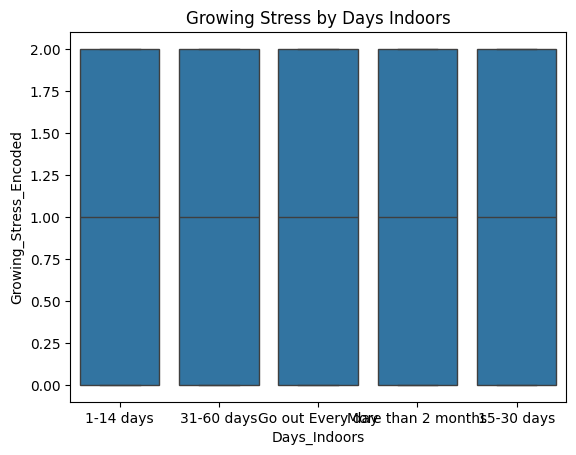

In [24]:
sns.boxplot(x='Days_Indoors', y='Growing_Stress_Encoded', data=data)
plt.title("Growing Stress by Days Indoors")
plt.show()

Visualize Mood Swings by Age

<ipython-input-25-ba32c759702f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Mood_Swings_Encoded', data=data, ci=None)


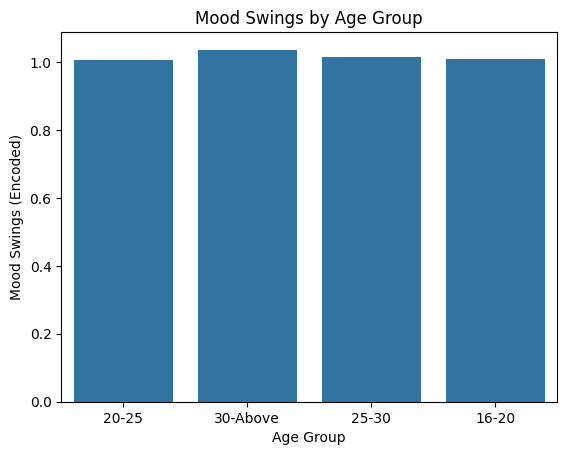

In [25]:
sns.barplot(x='Age', y='Mood_Swings_Encoded', data=data, ci=None)
plt.title("Mood Swings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mood Swings (Encoded)")
plt.show()

Tuning Random Forest Hyperparameters

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Evaluate Tuned Model

In [27]:
# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on test data
tuned_y_pred = best_model.predict(X_test)

# Evaluate tuned model
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
print(f"Tuned Model Accuracy: {tuned_accuracy}")

Tuned Model Accuracy: 0.34274193548387094


Predict Stress Level for New Data

In [48]:
# Example new data
new_data = [[0, 1, 2]]  # Gender=Male, Occupation=Corporate, Days_Indoors=1-14 days

# Predict stress level
new_prediction = rf_model.predict(new_data)
print(f"Predicted Growing Stress: {new_prediction[0]}")

Predicted Growing Stress: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix

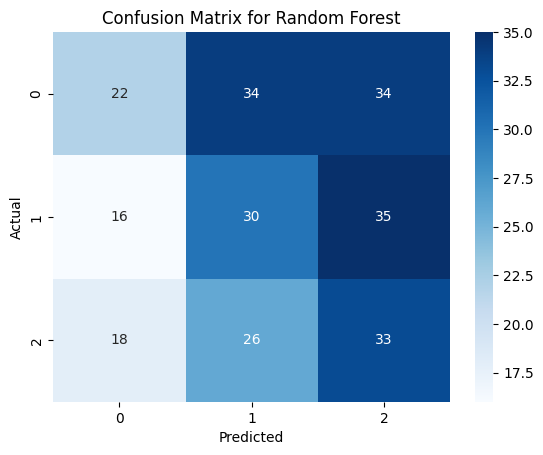

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Analyze Growing Stress by Occupation

<ipython-input-50-58d5d1c07751>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y='Growing_Stress_Encoded', data=data, ci=None, palette='Set2')
<ipython-input-50-58d5d1c07751>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Growing_Stress_Encoded', data=data, ci=None, palette='Set2')


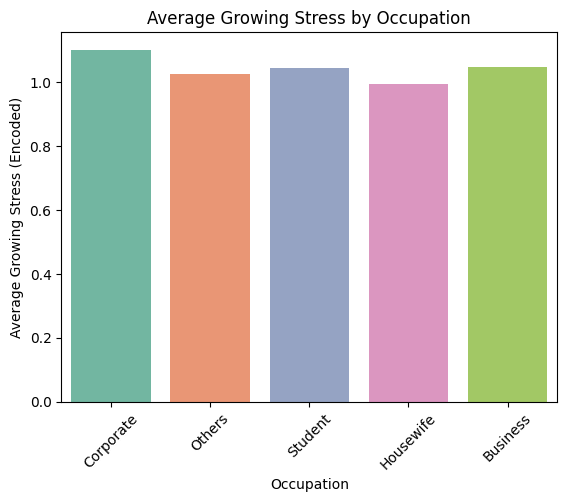

In [50]:
sns.barplot(x='Occupation', y='Growing_Stress_Encoded', data=data, ci=None, palette='Set2')
plt.title("Average Growing Stress by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Growing Stress (Encoded)")
plt.xticks(rotation=45)
plt.show()

Analyze Mood Swings by Gender

<ipython-input-51-6afc94c6fb35>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Mood_Swings_Encoded', data=data, palette='coolwarm')


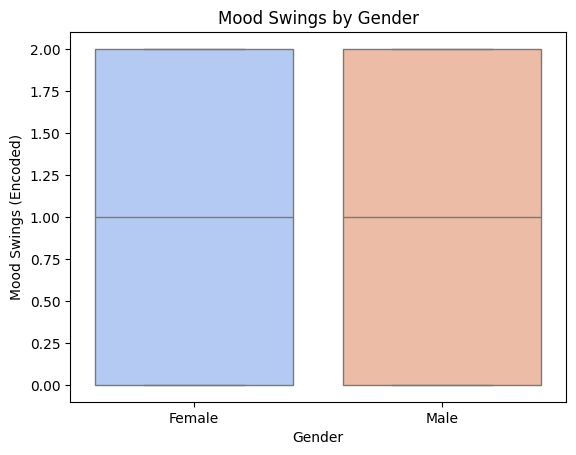

In [51]:
sns.boxplot(x='Gender', y='Mood_Swings_Encoded', data=data, palette='coolwarm')
plt.title("Mood Swings by Gender")
plt.xlabel("Gender")
plt.ylabel("Mood Swings (Encoded)")
plt.show()

Investigate Days Indoors Impact

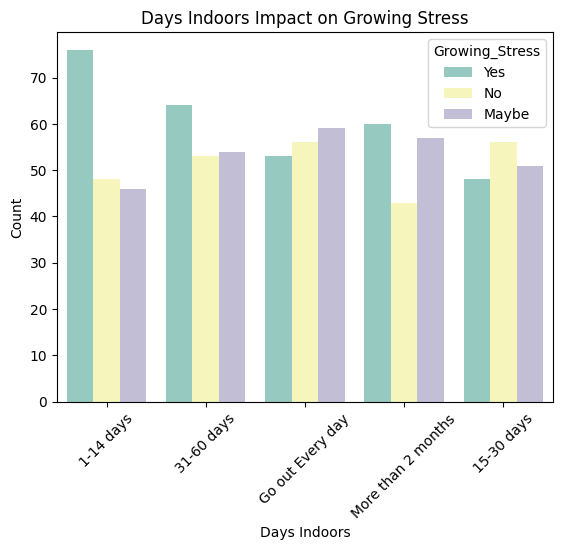

In [52]:
sns.countplot(x='Days_Indoors', hue='Growing_Stress', data=data, palette='Set3')
plt.title("Days Indoors Impact on Growing Stress")
plt.xlabel("Days Indoors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Compare Stress Levels Across Age Groups

<ipython-input-53-b7c2d8d87854>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Growing_Stress_Encoded', data=data, palette='Set1')


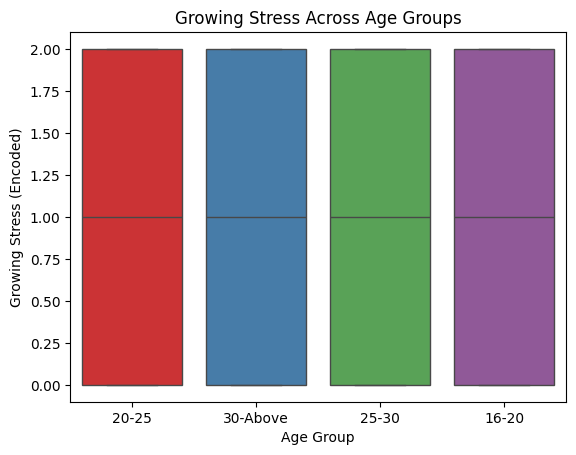

In [53]:
sns.boxplot(x='Age', y='Growing_Stress_Encoded', data=data, palette='Set1')
plt.title("Growing Stress Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Growing Stress (Encoded)")
plt.show()

Advanced Visualization: Stress Indicators

<ipython-input-54-f079f0eda080>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')
<ipython-input-54-f079f0eda080>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')


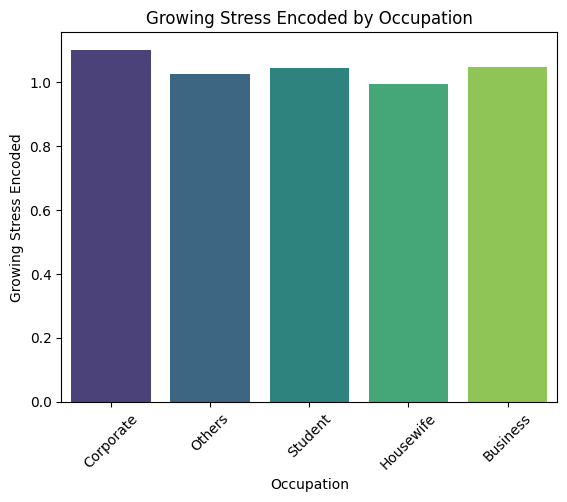

<ipython-input-54-f079f0eda080>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')
<ipython-input-54-f079f0eda080>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')


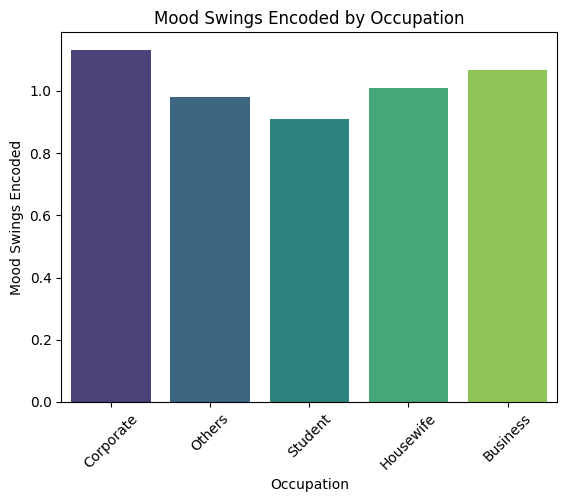

<ipython-input-54-f079f0eda080>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')
<ipython-input-54-f079f0eda080>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')


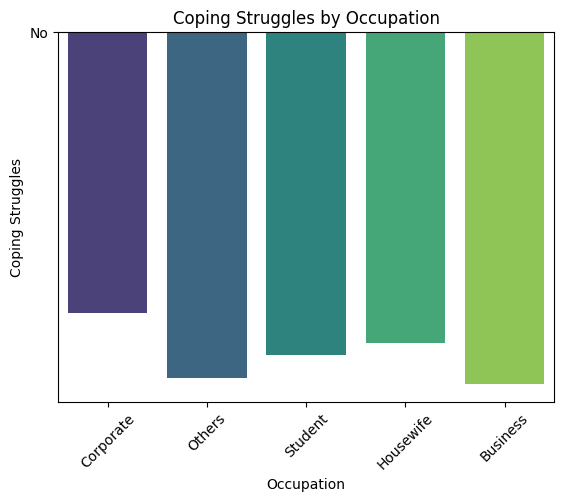

In [54]:
# Visualize multiple stress indicators by Occupation
indicators = ['Growing_Stress_Encoded', 'Mood_Swings_Encoded', 'Coping_Struggles']

for indicator in indicators:
    sns.barplot(x='Occupation', y=indicator, data=data, ci=None, palette='viridis')
    plt.title(f"{indicator.replace('_', ' ')} by Occupation")
    plt.xlabel("Occupation")
    plt.ylabel(indicator.replace('_', ' '))
    plt.xticks(rotation=45)
    plt.show()

Build Support Vector Machine (SVM) Model

In [55]:
from sklearn.svm import SVC

# Train an SVM classifier for Growing Stress
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict with SVM
svm_y_pred = svm_model.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy}")
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.31048387096774194
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.00      0.00      0.00        81
           2       0.31      1.00      0.47        77

    accuracy                           0.31       248
   macro avg       0.10      0.33      0.16       248
weighted avg       0.10      0.31      0.15       248



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


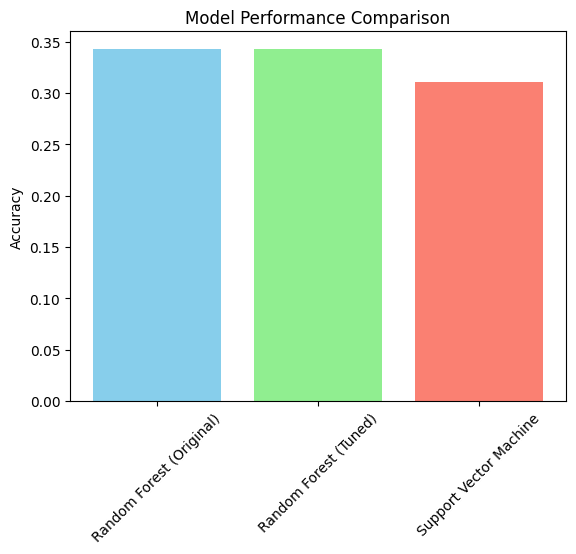

Random Forest (Original): 0.34
Random Forest (Tuned): 0.34
Support Vector Machine: 0.31


In [56]:
# Summary of model performances
model_performance = {
    'Random Forest (Original)': accuracy,
    'Random Forest (Tuned)': tuned_accuracy,
    'Support Vector Machine': svm_accuracy
}

# Plot model comparison
plt.bar(model_performance.keys(), model_performance.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Print summary insights
for model, acc in model_performance.items():
    print(f"{model}: {acc:.2f}")

Feature Engineering

In [57]:
# Create interaction features
data['Gender_Occupation'] = data['Gender_Encoded'] * data['Occupation_Encoded']
data['Days_Stress_Interaction'] = data['Days_Indoors_Encoded'] * data['Growing_Stress_Encoded']

Ordinal Encoding for Days Indoors

In [58]:
# Map Days_Indoors to ordinal values
days_mapping = {'Go out Every day': 0, '1-14 days': 1, '31-60 days': 2, '61+ days': 3}
data['Days_Ordinal'] = data['Days_Indoors'].map(days_mapping)

Balance the Dataset

In [59]:
from sklearn.utils import resample

# Check class distribution
print(data['Growing_Stress_Encoded'].value_counts())

# Separate majority and minority classes
majority = data[data['Growing_Stress_Encoded'] == 0]
minority = data[data['Growing_Stress_Encoded'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine majority and upsampled minority
data_balanced = pd.concat([majority, minority_upsampled])

# Verify class balance
print(data_balanced['Growing_Stress_Encoded'].value_counts())

Growing_Stress_Encoded
2    301
0    267
1    256
Name: count, dtype: int64
Growing_Stress_Encoded
0    267
1    267
Name: count, dtype: int64


Normalize Numerical Features

In [60]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['Days_Ordinal', 'Gender_Occupation', 'Days_Stress_Interaction']

# Scale features
scaler = StandardScaler()
data_balanced[numerical_features] = scaler.fit_transform(data_balanced[numerical_features])

Split the Data

In [61]:
# Define features (X) and target (y)
X = data_balanced[['Gender_Encoded', 'Occupation_Encoded', 'Days_Ordinal',
                   'Gender_Occupation', 'Days_Stress_Interaction']]
y = data_balanced['Growing_Stress_Encoded']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Improve Random Forest Model

Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for Random Forest: {rf_grid.best_params_}")

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Train Random Forest with Best Parameters

In [63]:
# Train Random Forest with tuned hyperparameters
rf_best = rf_grid.best_estimator_
rf_best.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_best.predict(X_test)

# Evaluate model
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9254658385093167
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        79
           1       0.92      0.94      0.93        82

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



Improve Support Vector Machine (SVM)

Hyperparameter Tuning

In [64]:
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for SVM: {svm_grid.best_params_}")

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Check for Missing Values

In [65]:
# Check for missing values in the training and testing datasets
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("Missing values in X_test:")
print(X_test.isnull().sum())

Missing values in X_train:
Gender_Encoded               0
Occupation_Encoded           0
Days_Ordinal               148
Gender_Occupation            0
Days_Stress_Interaction      0
dtype: int64
Missing values in X_test:
Gender_Encoded              0
Occupation_Encoded          0
Days_Ordinal               61
Gender_Occupation           0
Days_Stress_Interaction     0
dtype: int64


Handle Missing Values

In [66]:
from sklearn.impute import SimpleImputer

# Impute missing values in training and testing sets
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' for categorical data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [68]:
print("After handling missing values:")
print("X_train missing values:\n", X_train.isnull().sum())
print("X_test missing values:\n", X_test.isnull().sum())

After handling missing values:
X_train missing values:
 Gender_Encoded             0
Occupation_Encoded         0
Days_Ordinal               0
Gender_Occupation          0
Days_Stress_Interaction    0
dtype: int64
X_test missing values:
 Gender_Encoded             0
Occupation_Encoded         0
Days_Ordinal               0
Gender_Occupation          0
Days_Stress_Interaction    0
dtype: int64


Retry GridSearchCV

In [69]:
# Perform GridSearchCV for SVM after handling missing values
svm_grid = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best Parameters for SVM: {svm_grid.best_params_}")
print(f"Best Cross-Validation Score: {svm_grid.best_score_}")

Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9142342342342342


Train and Evaluate the Final SVM Model

In [70]:
# Train the best SVM model
svm_best = svm_grid.best_estimator_
svm_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_best.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9254658385093167
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        79
           1       1.00      0.85      0.92        82

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.94      0.93      0.93       161



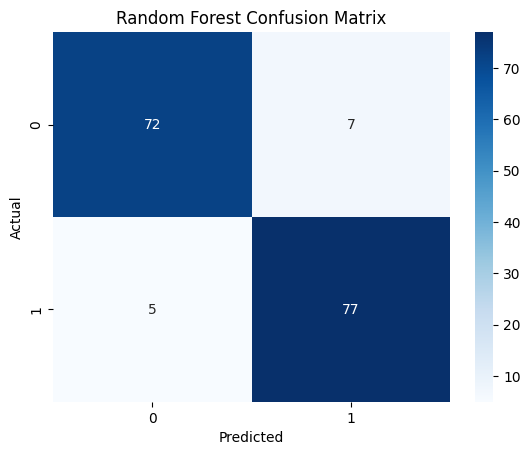

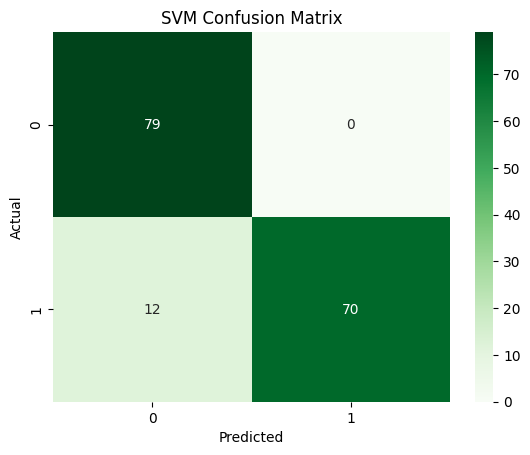

In [71]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
# Compare accuracy of Random Forest and SVM
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

Random Forest Accuracy: 0.9254658385093167
SVM Accuracy: 0.9254658385093167


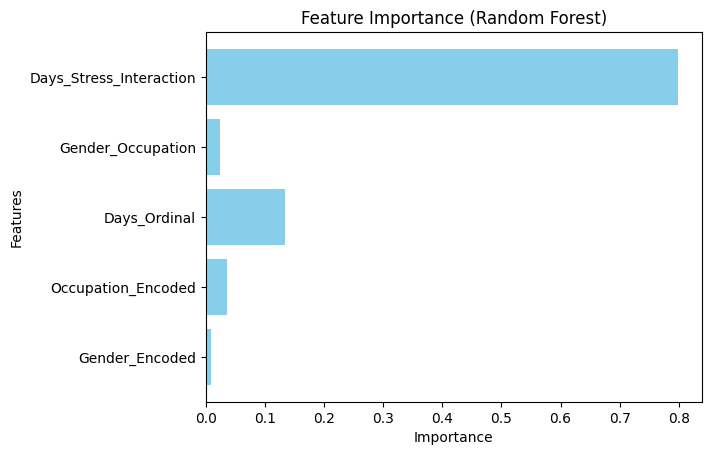

In [73]:
# Plot feature importance for Random Forest
importances = rf_best.feature_importances_
features = X.columns

plt.barh(features, importances, color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Performing ANOVA Tests with these improved mdels now

1. ANOVA for Age

In [74]:
# Perform ANOVA for Age and Growing Stress
age_groups = [data_balanced[data_balanced['Age'] == group]['Growing_Stress_Encoded'] for group in data_balanced['Age'].unique()]

# Perform one-way ANOVA
anova_age_result = f_oneway(*age_groups)
print(f"ANOVA Results for Age:\nF-Statistic: {anova_age_result.statistic}, P-Value: {anova_age_result.pvalue}")

ANOVA Results for Age:
F-Statistic: 1.9220074344855078, P-Value: 0.12495281861087672


2. ANOVA for Gender

In [75]:
# Perform ANOVA for Gender and Growing Stress
gender_groups = [data_balanced[data_balanced['Gender'] == group]['Growing_Stress_Encoded'] for group in data_balanced['Gender'].unique()]

# Perform one-way ANOVA
anova_gender_result = f_oneway(*gender_groups)
print(f"ANOVA Results for Gender:\nF-Statistic: {anova_gender_result.statistic}, P-Value: {anova_gender_result.pvalue}")

ANOVA Results for Gender:
F-Statistic: 0.26942771931799, P-Value: 0.6039317771331041


3. ANOVA for Occupation

In [76]:
# Perform ANOVA for Occupation and Growing Stress
occupation_groups = [data_balanced[data_balanced['Occupation'] == group]['Growing_Stress_Encoded'] for group in data_balanced['Occupation'].unique()]

# Perform one-way ANOVA
anova_occupation_result = f_oneway(*occupation_groups)
print(f"ANOVA Results for Occupation:\nF-Statistic: {anova_occupation_result.statistic}, P-Value: {anova_occupation_result.pvalue}")

ANOVA Results for Occupation:
F-Statistic: 0.8940471015805886, P-Value: 0.4671827425572277


Visualize Stress Levels by Age

<ipython-input-78-af8a016787ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Growing_Stress_Encoded', data=data_balanced, palette='Set3')


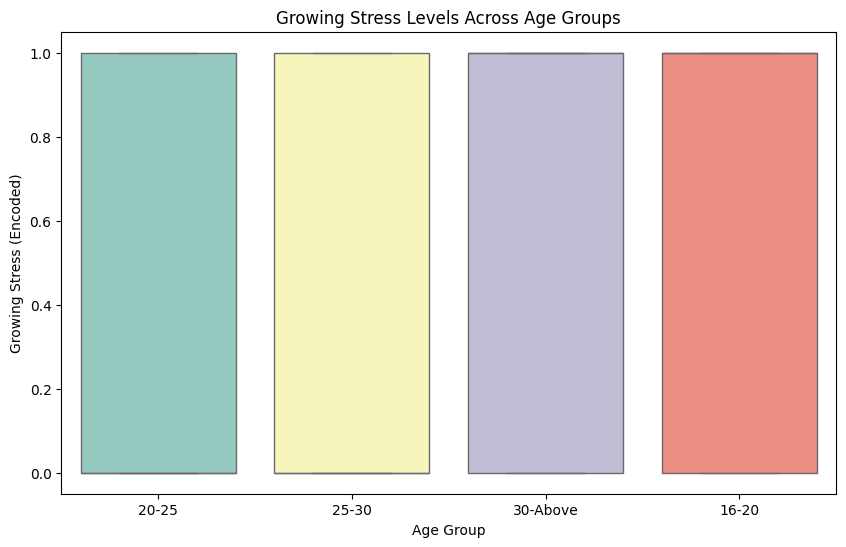

In [78]:
# Boxplot for Growing Stress by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Growing_Stress_Encoded', data=data_balanced, palette='Set3')
plt.title("Growing Stress Levels Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Growing Stress (Encoded)")
plt.show()

Visualize Stress Levels by Gender

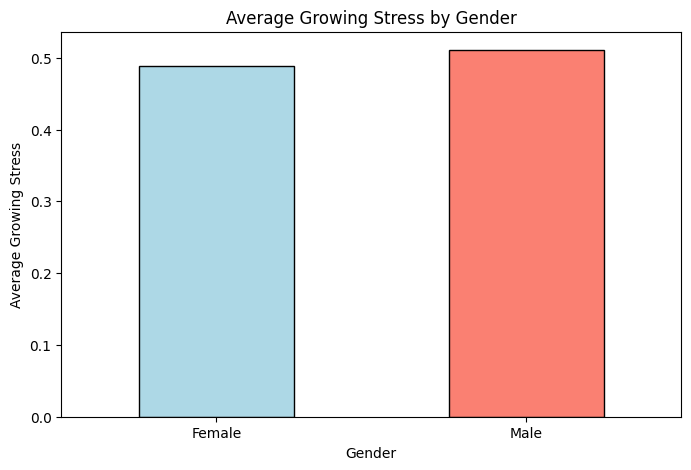

In [79]:
# Bar plot for Growing Stress by Gender
gender_means = data_balanced.groupby('Gender')['Growing_Stress_Encoded'].mean()

plt.figure(figsize=(8, 5))
gender_means.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
plt.title("Average Growing Stress by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Growing Stress")
plt.xticks(rotation=0)
plt.show()

Visualize Stress Levels by Occupation

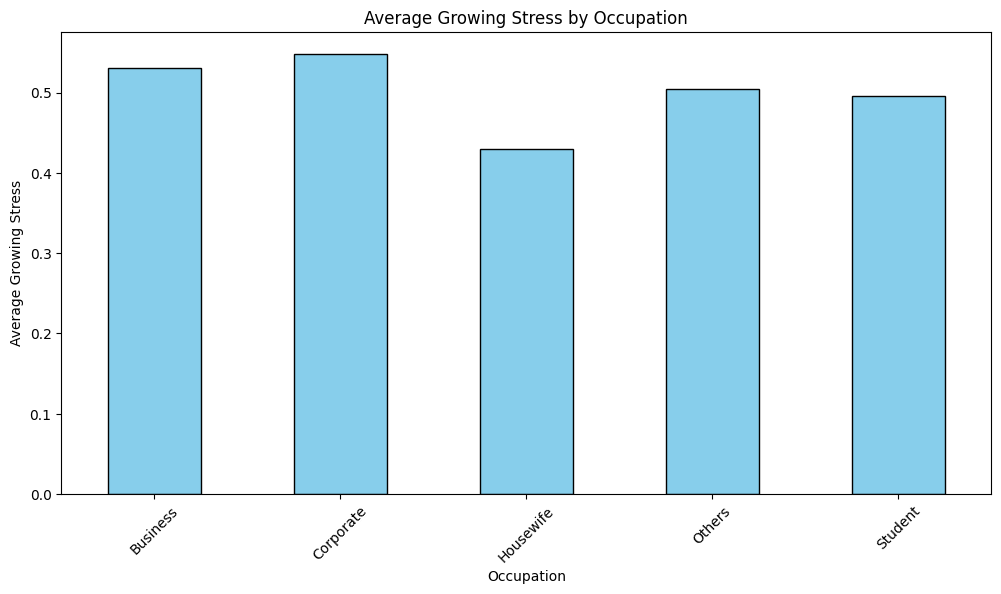

In [80]:
# Bar plot for Growing Stress by Occupation
occupation_means = data_balanced.groupby('Occupation')['Growing_Stress_Encoded'].mean()

plt.figure(figsize=(12, 6))
occupation_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Growing Stress by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Growing Stress")
plt.xticks(rotation=45)
plt.show()

Combine ANOVA Results

<ipython-input-81-4351c807b556>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Factor', y='F-Statistic', data=anova_df, palette='viridis', edgecolor='black')


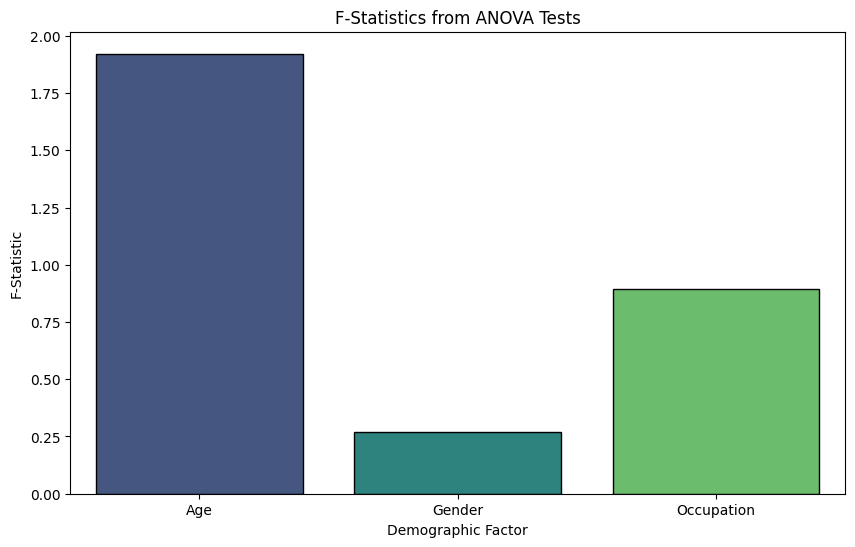

<ipython-input-81-4351c807b556>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Factor', y='P-Value', data=anova_df, palette='coolwarm', edgecolor='black')


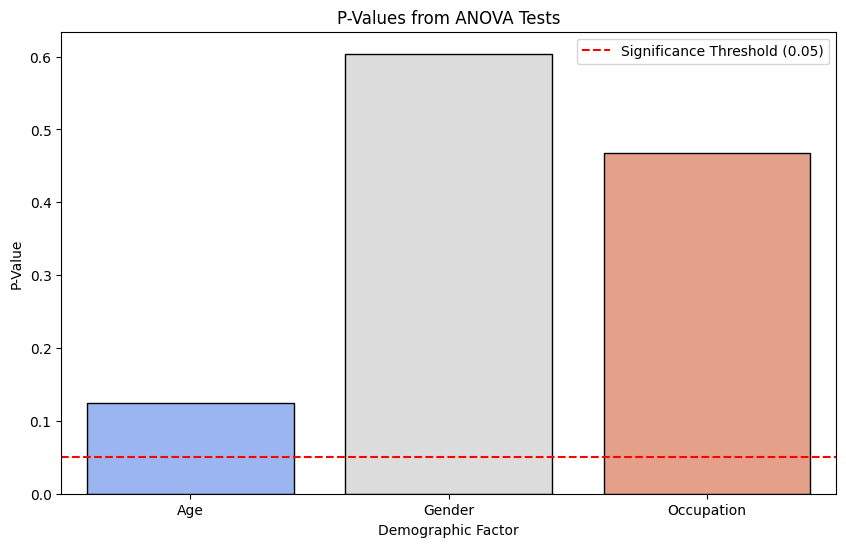

In [81]:
# ANOVA results summary
anova_results = {
    'Factor': ['Age', 'Gender', 'Occupation'],
    'F-Statistic': [anova_age_result.statistic, anova_gender_result.statistic, anova_occupation_result.statistic],
    'P-Value': [anova_age_result.pvalue, anova_gender_result.pvalue, anova_occupation_result.pvalue]
}

anova_df = pd.DataFrame(anova_results)

# Bar plot for F-statistics
plt.figure(figsize=(10, 6))
sns.barplot(x='Factor', y='F-Statistic', data=anova_df, palette='viridis', edgecolor='black')
plt.title("F-Statistics from ANOVA Tests")
plt.ylabel("F-Statistic")
plt.xlabel("Demographic Factor")
plt.show()

# Bar plot for P-values
plt.figure(figsize=(10, 6))
sns.barplot(x='Factor', y='P-Value', data=anova_df, palette='coolwarm', edgecolor='black')
plt.title("P-Values from ANOVA Tests")
plt.ylabel("P-Value")
plt.xlabel("Demographic Factor")
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()

Significant Relationships

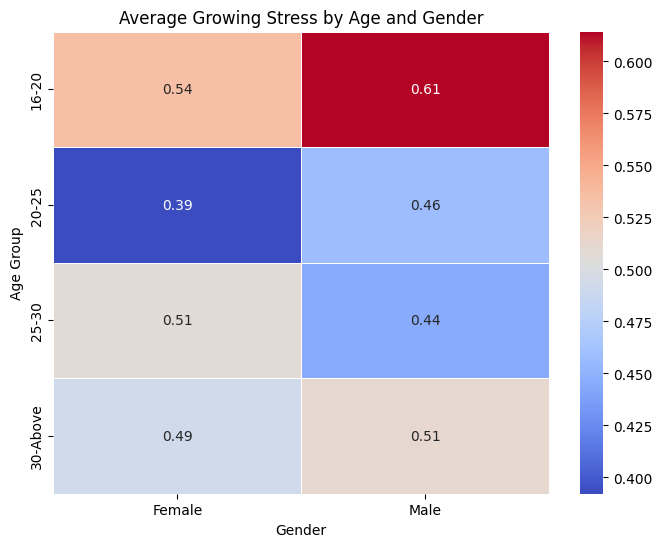

In [82]:
# Create a pivot table for Age, Gender, and Growing Stress
heatmap_data = data_balanced.pivot_table(
    values='Growing_Stress_Encoded',
    index='Age',
    columns='Gender',
    aggfunc='mean'
)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Average Growing Stress by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.show()